In [2]:
# import needed libraries
import time
from random import *
from matplotlib import animation, pyplot as plt
import numpy as np
import numba

In [3]:
# gathering information for initializing the forest

GROUND = 0 # represents an empty ground
NON_BURNING_TREE = 1 # represents an area with a non burning tree
BURNING_TREE = 2 # represents an area with a burning tree
BORDERLINE = 3 # represents borderline around the forest

animation_delay = 400 # represents the delay between each frame of the animation in milliseconds, frame means after spread of fire

probTree = 0.8 # represents the probability that a tree initially ocupies the area
probBurning = 0.01 # represents the probability that a tree is burning
probImmune = 0.3 # represents the probability that a tree is immune to fire
probLightning = 0.001 # represents the probability that an area suffered a lightning strike

Non Parallel Simulation of the Spread

In [4]:
# here we create a function to initialize the forest site
def initForestState(sizeOfForest):
    
    # creating a multidimensional array of size sizeOfForest with one row and column
    # of borderline to all sides of the forest.
    # (assumming the site is firstly created with all borderlines),
    forestGrid = np.ones((sizeOfForest + 2, sizeOfForest + 2)) * BORDERLINE
    
    # now we fill the forest with trees, according to the given probabilities above
    # looping through the forest grids (excluding the borders) and assigning the values
    # for the ground, trees and burning trees
    for i in range(1, sizeOfForest + 1):
        for j in range(1, sizeOfForest + 1):
            
            # we check for a burning tree and tree at this position
            # but there has to be a tree, for the tree to be burning
            # so let's check for a tree first
            if random() < probTree:
                if random() < probBurning:
                    # the area contains a burning tree
                    forestGrid[i, j] = BURNING_TREE
                else:
                    # the area contains a non burning tree
                    forestGrid[i, j] = NON_BURNING_TREE
            else:
                # the area is empty
                forestGrid[i, j] = GROUND
                
    # returning the forest grid
    return forestGrid
    

In [5]:
# spread the fire with Moore neighborhood algorithm

def spreadTheFireWithMoore(sizeOfForest, forest):
    
    # looping through the forest grids (excluding the borders)
    for i in range(1, sizeOfForest + 1):
        for j in range(1, sizeOfForest + 1):
            
            # if the area is a tree
            if forest[i,j] == NON_BURNING_TREE:
                    
                # see if there's a burning tree next to the area
                # von Neumann neighborhood are 4-neighborhoods (north, south, east and west) but we won't use them
                # the 8 moore neighborhoods (north, north-east, north-west, south, south-east, south-west, west, east)
                # can tell us if there's a burning tree
                if (forest[i - 1, j] == BURNING_TREE or forest[i + 1, j] == BURNING_TREE or 
                    forest[i, j - 1] == BURNING_TREE or forest[i, j + 1] == BURNING_TREE or 
                    forest[i - 1, j - 1] == BURNING_TREE or forest[i - 1, j + 1] == BURNING_TREE or 
                    forest[i + 1, j - 1] == BURNING_TREE or forest[i + 1, j + 1] == BURNING_TREE):
                    forest[i - 1, j] = BURNING_TREE # tree will burn
    
                    # if the area is immune to fire the tree does not burn
                    if random() < probImmune:
                        forest[i,j] = NON_BURNING_TREE
                    else:
                        forest[i,j] = BURNING_TREE
                        
                # if the area suffered a lightning strike the tree burns
                elif random() < probLightning:
                    
                    # if the area is immune to fire the tree does not burn
                    if random() < probImmune:
                        forest[i,j] = NON_BURNING_TREE
                    else:
                        forest[i,j] = BURNING_TREE
                
                # else the tree doesn't burn cause there are burning influences
                else:
                    forest[i, j] = NON_BURNING_TREE 
            
            # if the area is already a burning tree, then the tree burns to the ground
            elif forest[i, j] == BURNING_TREE:
                forest[i, j] = GROUND
            
            # otherwise the area remains empty if it's a ground
            else:
                forest[i, j] = GROUND
            
    return forest

In [6]:
def VisualizeForestFireSpread(sizeOfForest, forest, fig_no):
        
    fig = plt.figure(num=fig_no)
    ax = fig.add_subplot(111)
    ax.set_title('Simulation of Forest Fire Spread With Size {0}'.format(sizeOfForest))
    ax.set_axis_off()
    
    # select only the forest site with no borderlines
    Onlyforest = forest[1:sizeOfForest + 1, 1:sizeOfForest + 1]
    
    # extend the grid using periodic boundary conditions
    
    # extending the boundary rows with ghost areas so that we can spread the fire at the site borders too.
    rowStack = np.row_stack((Onlyforest[-1,:], Onlyforest, Onlyforest[0,:]))
    
    # extending the boundary columns with ghost areas so that we can spread the fire at the site borders too.
    forestAfterExtension = np.column_stack((rowStack[:,-1], rowStack, rowStack[:,0]))
    
    # now we can spread the fire  
    appliedSpreadForest = spreadTheFireWithMoore(sizeOfForest, forestAfterExtension)
    
    # remove the ghost areas and return the borderline before plotting
    Onlyforest = appliedSpreadForest[1:sizeOfForest + 1, 1:sizeOfForest + 1]
    forest[1:sizeOfForest + 1, 1:sizeOfForest + 1] = Onlyforest
    
    # plot the forest
    forestGridVisual = ax.imshow(forest, cmap = 'binary')
        
    return fig, forest, forestGridVisual

MovieWriter ffmpeg unavailable; using Pillow instead.


Time elapsed for applying the spread on forest grid size 100: 0.05385422706604004 seconds


IndexError: list index out of range

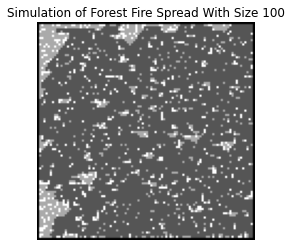

In [8]:
startTime = time.time()
gridSize = 100
fig_no = 1

forest = initForestState(gridSize)

fig, forest_test, forestGridVisual = VisualizeForestFireSpread(gridSize, forest, fig_no)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 100: {0} seconds".format(timeElapsed))

def animate(i):
    global forest
    forestGridVisual.set_array(forest)
    forest = VisualizeForestFireSpread(gridSize, forest, fig_no)
    return forestGridVisual

anim = animation.FuncAnimation(fig, animate, interval=animation_delay, frames=20)

# saving the animation as an mp4 video file
anim.save('fire_spread_animation{0}.mp4'.format(gridSize), fps=30)

plt.show()

In [ ]:
startTime = time.time()

VisualizeForestFireSpread(400, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 400: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread(800, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 800: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread(1000, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 1000: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread(1200, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 1200: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread(2000, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread on forest grid size 2000: {0} seconds".format(timeElapsed))

Parallelizing the Simulation of the Spread

In [ ]:
# Parallelizing the initForestState function

numba.jit(nopython=True, parallel=True)
def initForestState_Parallel(sizeOfForest):
    
    # creating a multidimensional array of size sizeOfForest with one row and column
    # of borderline to all sides of the forest.
    # (assumming the site is firstly created with all borderlines),
    forestGrid = np.ones((sizeOfForest + 2, sizeOfForest + 2)) * BORDERLINE
    
    # now we fill the forest with trees, according to the given probabilities above
    # looping through the forest grids (excluding the borders) and assigning the values
    # for the ground, trees and burning trees
    for i in numba.prange(1, sizeOfForest + 1):
        for j in numba.prange(1, sizeOfForest + 1):
            
            # we check for a burning tree and tree at this position
            # but there has to be a tree, for the tree to be burning
            # so let's check for a tree first
            if random() < probTree:
                if random() < probBurning:
                    # the area contains a burning tree
                    forestGrid[i, j] = BURNING_TREE
                else:
                    # the area contains a non burning tree
                    forestGrid[i, j] = NON_BURNING_TREE
            else:
                # the area is empty
                forestGrid[i, j] = GROUND
                
    # returning the forest grid
    return forestGrid
    

In [3]:
# Parallelizing the spread of the fire with Moore neighborhood algorithm

numba.jit(nopython=True, parallel=True)
def spreadTheFireWithMoore_Parallel(sizeOfForest, forestGrid):
    
    for i in numba.prange(1, sizeOfForest + 1):
        for j in numba.prange(1, sizeOfForest + 1):
            
            # if the area is a tree
            if forestGrid[i,j] == NON_BURNING_TREE:
                    
                # see if there's a burning tree next to the area
                # von Neumann neighborhood are 4-neighborhoods (north, south, east and west) but we won't use them
                # the 8 moore neighborhoods (north, north-east, north-west, south, south-east, south-west, west, east)
                # can tell us if there's a burning tree
                if (forestGrid[i - 1, j] == BURNING_TREE or forestGrid[i + 1, j] == BURNING_TREE or 
                    forestGrid[i, j - 1] == BURNING_TREE or forestGrid[i, j + 1] == BURNING_TREE or 
                    forestGrid[i - 1, j - 1] == BURNING_TREE or forestGrid[i - 1, j + 1] == BURNING_TREE or 
                    forestGrid[i + 1, j - 1] == BURNING_TREE or forestGrid[i + 1, j + 1] == BURNING_TREE):
                    forestGrid[i - 1, j] = BURNING_TREE # tree will burn
    
                    # if the area is immune to fire the tree does not burn
                    if random() < probImmune:
                        forestGrid[i,j] = NON_BURNING_TREE
                    else:
                        forestGrid[i,j] = BURNING_TREE
                        
                # if the area suffered a lightning strike the tree burns
                elif random() < probLightning:
                    
                    # if the area is immune to fire the tree does not burn
                    if random() < probImmune:
                        forestGrid[i,j] = NON_BURNING_TREE
                    else:
                        forestGrid[i,j] = BURNING_TREE
                
                # else the tree doesn't burn cause there are burning influences
                else:
                    forestGrid[i, j] = NON_BURNING_TREE 
            
            # if the area is already a burning tree, then the tree burns to the ground
            elif forestGrid[i, j] == BURNING_TREE:
                forestGrid[i, j] = GROUND
            
            # otherwise the area remains empty if it's a ground
            else:
                forestGrid[i, j] = GROUND
            
    return forestGrid

In [ ]:
numba.jit(nopython=True, parallel=True)
def VisualizeForestFireSpread_Parallel(sizeOfForest, noOfIteration):
        
    forest = initForestState_Parallel(sizeOfForest)
        
    fig = plt.figure()
    ax = plt.axes(xlim=(0, sizeOfForest + 2), ylim=(0, sizeOfForest + 2))
    plt.title('Simulation of Forest Fire Spread With Size {0}'.format(sizeOfForest))
    plt.xlabel('x')
    plt.ylabel('y')
      
    # plot the forest
    plt.imshow(forest, cmap = 'binary')
        
    # plot the initial state of the forest
    plt.show()
        
    # plot the forest after each iteration
    for i in numba.prange(noOfIteration):
        forest = spreadTheFireWithMoore_Parallel(sizeOfForest, forest)
        plt.imshow(forest, cmap = 'binary')
        plt.show()

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(100, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 100: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(400, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 400: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(800, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 800: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(1000, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 1000: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(1200, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 1200: {0} seconds".format(timeElapsed))

In [ ]:
startTime = time.time()

VisualizeForestFireSpread_Parallel(2000, 10)

timeElapsed = time.time() - startTime
print("Time elapsed for applying the spread (Parallel) on forest grid size 2000: {0} seconds".format(timeElapsed))